Israel Wartime Data
significant event years vs non significant event years

We were able to collect data for Israels Agriculture from 1990 to present day and set to see if there is a significant change in the production of crops during conflicts.  Below are a list of years and opperations that took place in the land of Israel that could have effected the agricultural production.  It is also important to note that since 2008 Gush Katif has sent countless rockets into Israel on a regular basis.

First Intifada (1987–1993)

Gulf War (1990–1991) Iraq launched Scud missiles at Israel

Second Intifada (2000–2005)

2006 Lebanon War (July–August 2006)

Gaza War (Operation Cast Lead) (December 2008–January 2009)

Operation Returning Echo (March 2012) Heavy Gaza rocket attacks
Operation Pillar of Defense (November 2012) An eight-day conflict with Hamas

2014 Gaza War (Operation Protective Edge) (July–August 2014)

Operation Black Belt (November 2019) A brief conflict with Palestinian Islamic Jihad in Gaza

Operation Guardian of the Walls (May 2021) An 11-day conflict with Hamas

Frequent Border Skirmishes and Rocket Attacks (1990s–2020s) Ongoing skirmishes and periodic rocket attacks from Gaza and Lebanon

Operation Breaking Dawn (August 2022) A brief conflict involving Palestinian rocket fire

In [23]:
#Clean the Data
import pandas as pd

file_path = 'Israel_Wheat_WarTime.csv'
df = pd.read_csv(file_path)

df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.dropna()

print(df.head())

df_cleaned = df_cleaned[~df_cleaned['Year'].isin([2024, 2025])]

  Country Commodity     Measure Unit of measure  Year     Value
0  Israel     Wheat  Production          Tonnes  1990  291.0000
1  Israel     Wheat  Production          Tonnes  1999   29.0000
2  Israel     Wheat  Production          Tonnes  2025   82.6055
3  Israel     Wheat  Production          Tonnes  2024   81.5102
4  Israel     Wheat  Production          Tonnes  2023   80.1924


In [25]:
df_cleaned = df_cleaned.sort_values(by='Year')
print(df_cleaned)

   Country Commodity     Measure Unit of measure  Year     Value
0   Israel     Wheat  Production          Tonnes  1990  291.0000
35  Israel     Wheat  Production          Tonnes  1991  180.0000
34  Israel     Wheat  Production          Tonnes  1992  254.0000
33  Israel     Wheat  Production          Tonnes  1993  217.0000
32  Israel     Wheat  Production          Tonnes  1994  103.0000
31  Israel     Wheat  Production          Tonnes  1995  242.0000
30  Israel     Wheat  Production          Tonnes  1996  185.0000
29  Israel     Wheat  Production          Tonnes  1997  116.0000
28  Israel     Wheat  Production          Tonnes  1998  155.0000
1   Israel     Wheat  Production          Tonnes  1999   29.0000
27  Israel     Wheat  Production          Tonnes  2000   96.0000
26  Israel     Wheat  Production          Tonnes  2001  162.0000
25  Israel     Wheat  Production          Tonnes  2002  179.0000
24  Israel     Wheat  Production          Tonnes  2003  187.0000
23  Israel     Wheat  Pro

In [26]:
# Define the years of significant conflicts
conflict_years = [
    2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2012, 2014, 2021
]

war_years_df = df_cleaned[df_cleaned['Year'].isin(conflict_years)]
non_war_years_df = df_cleaned[~df_cleaned['Year'].isin(conflict_years)]

war_years_list = war_years_df['Year'].unique().tolist()
non_war_years_list = non_war_years_df['Year'].unique().tolist()

print("War Years:", war_years_list)
print("Non-War Years:", non_war_years_list)

War Years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2009, 2012, 2014, 2021]
Non-War Years: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2007, 2010, 2011, 2013, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023]


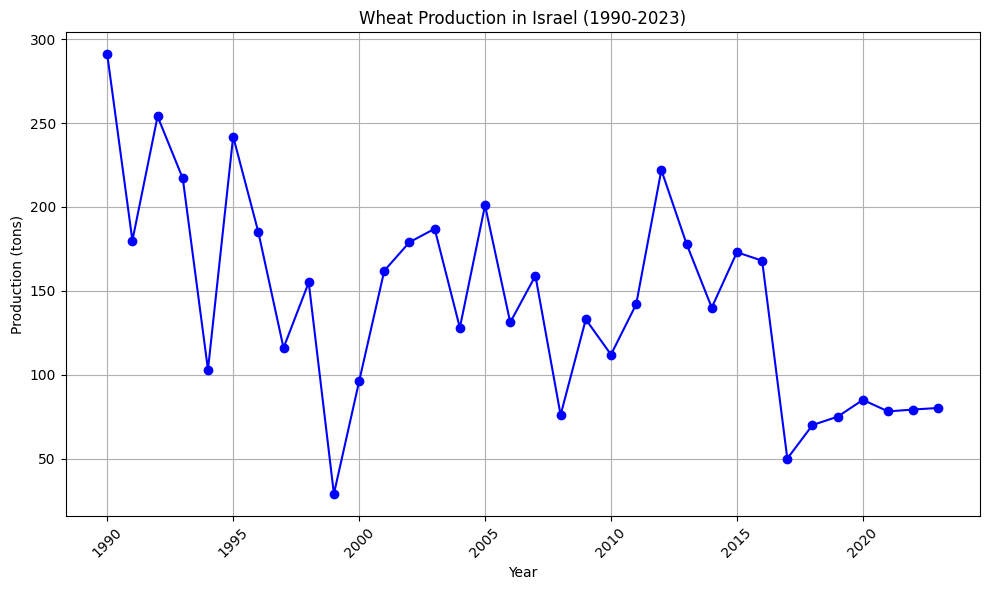

In [27]:
#Line Graph
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_cleaned['Year'], df_cleaned['Value'], marker='o', linestyle='-', color='b')
plt.title('Wheat Production in Israel (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Production (tons)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Average Production during the Second Intifada
years_2000_2005 = df_cleaned[(df_cleaned['Year'] >= 2000) & (df_cleaned['Year'] <= 2005)]
other_years = df_cleaned[(df_cleaned['Year'] < 2000) | (df_cleaned['Year'] > 2005)]

avg_production_2000_2005 = years_2000_2005['Value'].mean()
avg_production_other_years = other_years['Value'].mean()

print(f'Average production (2000-2005): {avg_production_2000_2005} tons')
print(f'Average production (other years): {avg_production_other_years} tons')

Average production (2000-2005): 158.83333333333334 tons
Average production (other years): 136.26290666666668 tons


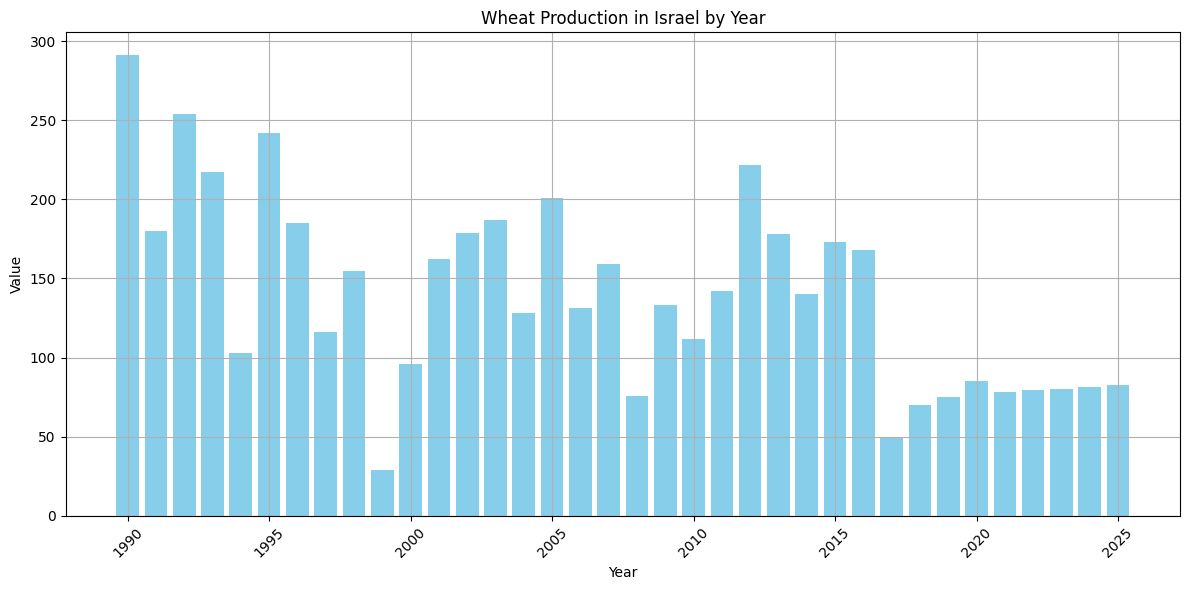

In [ ]:
#Bar Graph
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Israel_Wheat_WarTime.csv'
df = pd.read_csv(file_path)
df_cleaned = df_cleaned.sort_values(by='Year')

plt.figure(figsize=(12, 6))
plt.bar(df_cleaned['Year'], df_cleaned['Value'], color='skyblue')
plt.title('Wheat Production in Israel by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Interactive Visualization
import pandas as pd
import plotly.express as px

file_path = 'Israel_Wheat_WarTime.csv'
df = pd.read_csv(file_path)
df_cleaned = df_cleaned.sort_values(by='Year')

fig = px.line(df_cleaned, x='Year', y='Value', title='Wheat Production in Israel (1990-2023)')
fig.update_xaxes(type='category')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Value',
    xaxis=dict(tickangle=45),
    yaxis=dict(title='Production (tons)'),
    hovermode='x unified'
)

fig.show()

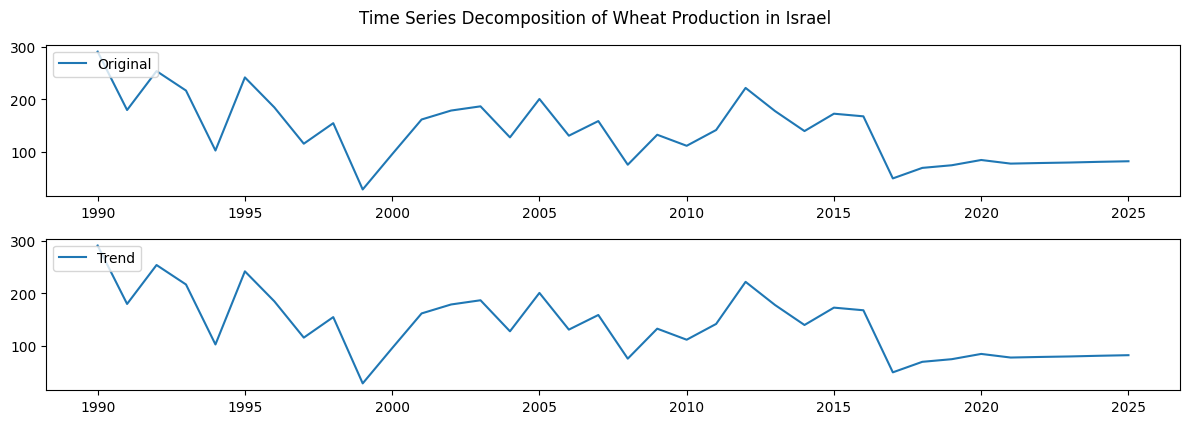

In [ ]:
#Time Series Decomposition Plot
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = 'Israel_Wheat_WarTime.csv'
df = pd.read_csv(file_path)
df_cleaned = df_cleaned.sort_values(by='Year')

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df_cleaned['Year'], df_cleaned['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df_cleaned['Year'], result.trend, label='Trend')
plt.legend(loc='upper left')

plt.suptitle('Time Series Decomposition of Wheat Production in Israel')
plt.tight_layout()
plt.show()

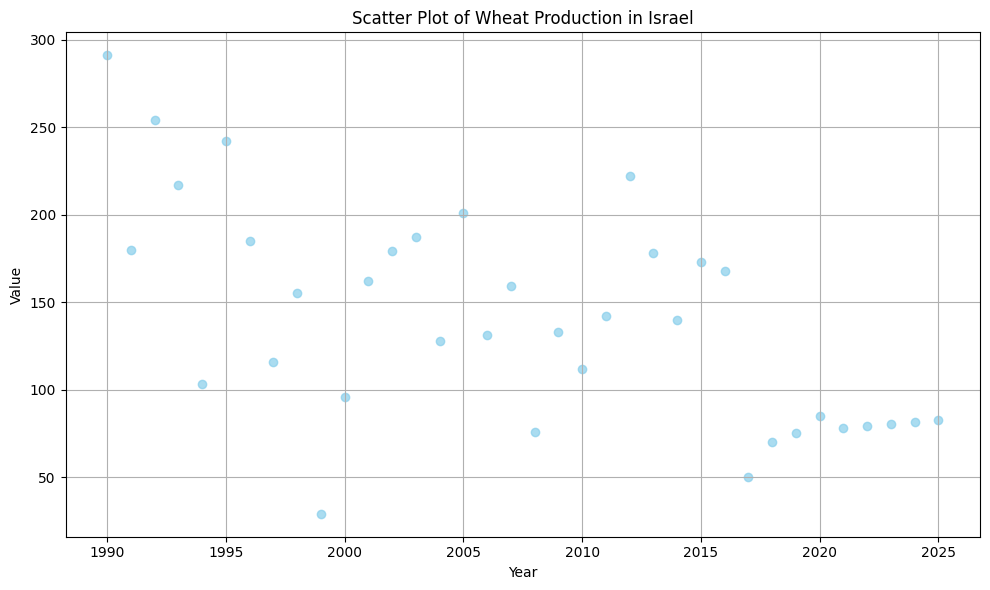

In [ ]:
#Scatter Plot
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned = df_cleaned.sort_values(by='Year')

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Year'], df_cleaned['Value'], color='skyblue', alpha=0.7)
plt.title('Scatter Plot of Wheat Production in Israel')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

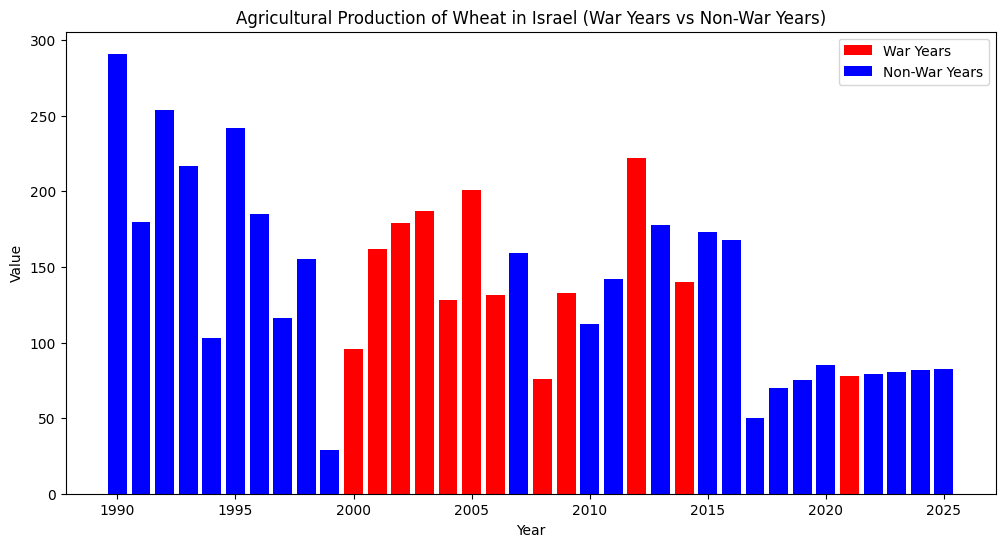

In [22]:
#Bar Graph of War years (Red) to Non War Years (Blue)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(war_years_df['Year'], war_years_df['Value'], color='red', label='War Years')
plt.bar(non_war_years_df['Year'], non_war_years_df['Value'], color='blue', label='Non-War Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Agricultural Production of Wheat in Israel (War Years vs Non-War Years)')
plt.legend()
plt.show()

Based on the data, the trend in agricultural production generally shows a decrease, with occasional spikes. Interestingly, the data suggests that conflicts have not had a significant impact on agricultural production, contrary to common assumptions. It's important to note that this analysis focuses solely on conflicts and does not account for environmental factors. For instance, in 1999, despite no recorded conflicts, there was a notable decrease in production, which continued into 2000 with the onset of the First Intifada. This highlights the complexity of factors influencing agricultural trends beyond conflict alone.



war years a different color than non war years blue vs red
t test for war years vs non war years